
# THE SPARKS FOUNDATION

## TASK #1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

# Author: Roshan Karkera

In [6]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [15]:
#Reading the data
data = pd.read_csv('http://bit.ly/w-data')
print("Data successfully imported")
data.head(5)

Data successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [14]:
data.isnull == True

False

In [18]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


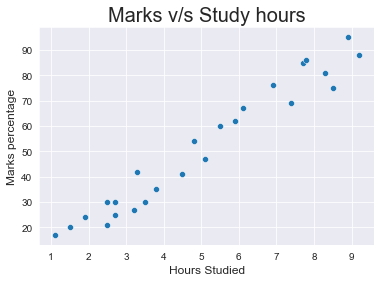

In [22]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x=data['Hours'])
plt.title('Marks v/s Study hours', size=20)
plt.ylabel('Marks percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.



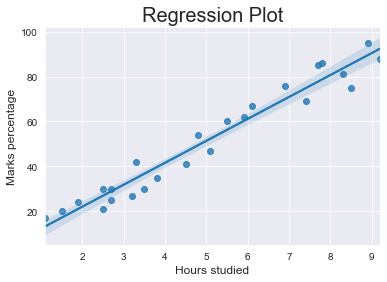

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [24]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression Plot', size=20)
plt.ylabel('Marks percentage', size=12)
plt.xlabel('Hours studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated

# Training the Model

1. Spilting the data

In [28]:
#Defining x and y from the Data
X = data.iloc[:, :-1].values
y= data.iloc[:, 1].values

#Spiliting the Data in two 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2.Fitting the Data into the model

In [30]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print('Model Trained')

Model Trained


# Predicting the Percentage of marks

In [34]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks' :[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Visually comparing the Predicted Marks with the Actual Marks

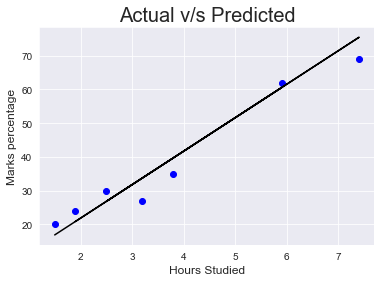

In [36]:
plt.scatter(x = val_X, y = val_y, color='blue')
plt.plot(val_X, pred_y, color='black')
plt.title('Actual v/s Predicted', size=20)
plt.ylabel('Marks percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Evaluating the Model

In [38]:
#Calculating the accuracy of the model
print('Mean absolute error', mean_absolute_error(val_X, pred_y))

Mean absolute error 35.399628895235665


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.



# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?


In [42]:
hours = [9.25]
answer = regression.predict([hours])
print('Score={}'.format(round(answer[0], 3)))

Score=93.893


# According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.